In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
from dataset import SNPmarkersDataset
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
train_dataset = SNPmarkersDataset(mode = "train")
validation_dataset = SNPmarkersDataset(mode = "validation")

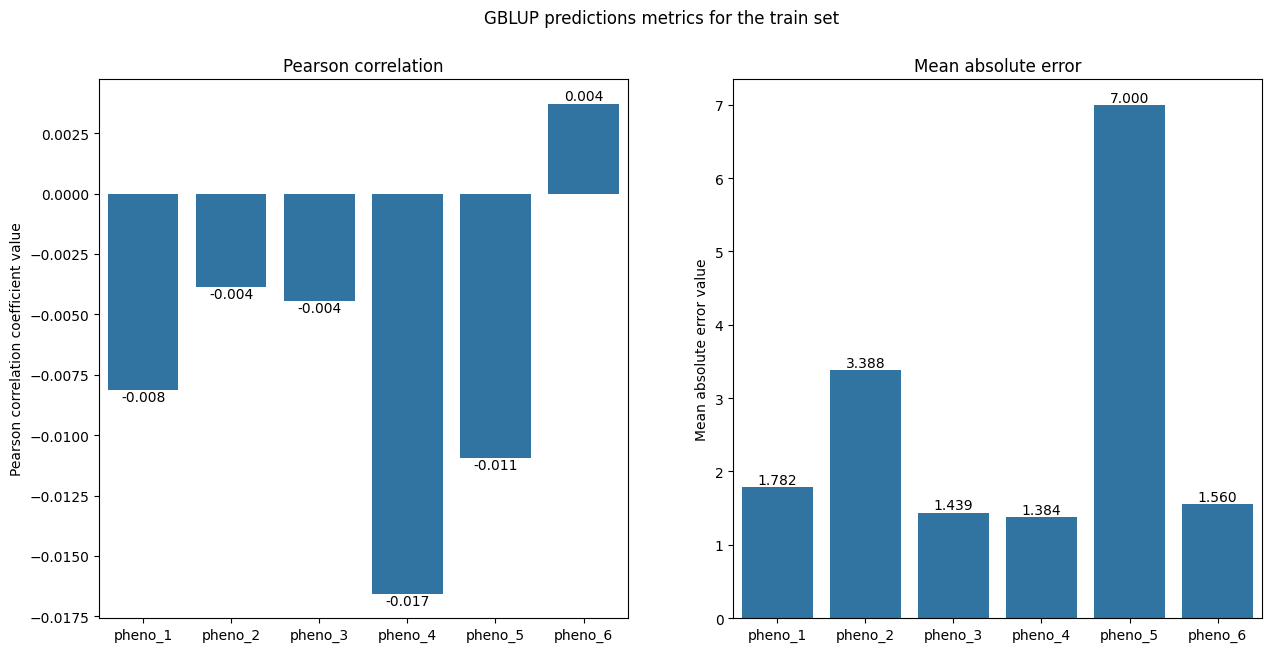

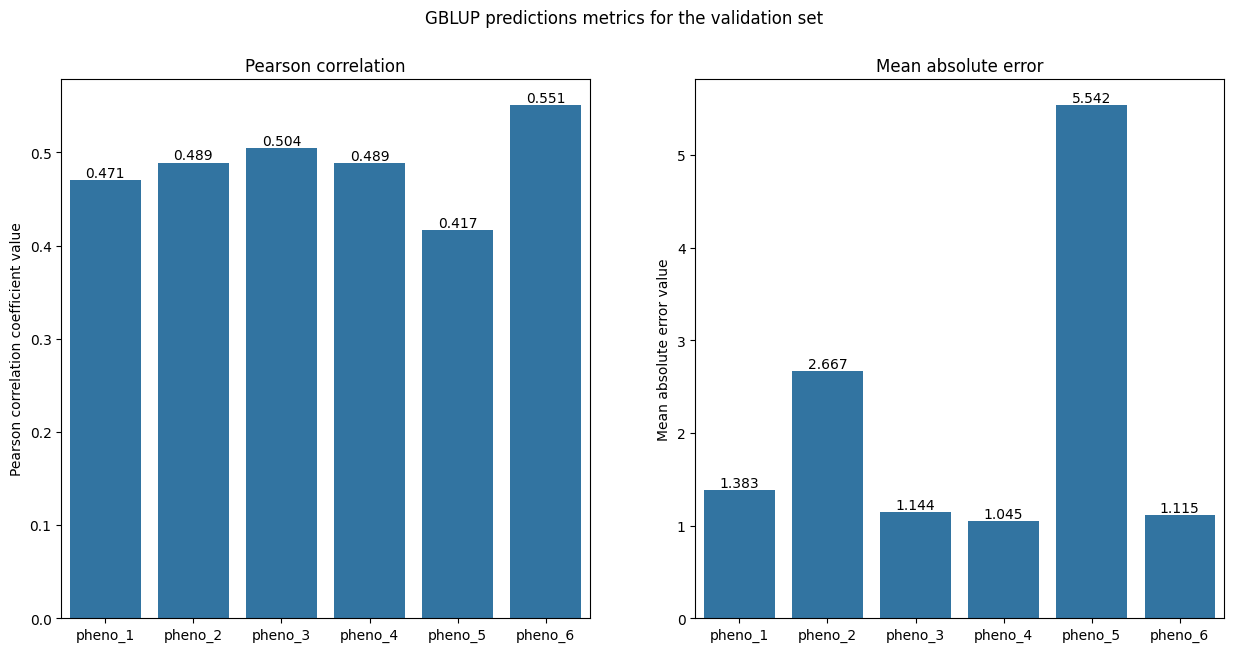

In [43]:
for dataset in [train_dataset, validation_dataset]:
    correlation = []
    MAE = []
    for pheno in dataset.phenotypes.keys():
        dataset.set_phenotypes = pheno
        indexes = dataset.get_all_SNP().index
        predictions = pd.read_csv(f"GBLUP/{pheno}/gblup.pred", sep = "\t", index_col= 1).loc[indexes]
        true_values = dataset.phenotypes[pheno]

        correlation.append(pearsonr(predictions["Total"], true_values).statistic)
        MAE.append(mean_absolute_error(predictions["Total"], true_values))

    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15 , 7))
    fig.suptitle(f"GBLUP predictions metrics for the {dataset.mode} set")
    sns.barplot(x=dataset.phenotypes.keys(), y=correlation, ax = ax1)
    ax1.set_title("Pearson correlation")
    ax1.set_ylabel("Pearson correlation coefficient value")

    for bar in ax1.containers:
        ax1.bar_label(bar, fmt='%.3f')

    sns.barplot(x=dataset.phenotypes.keys(), y= MAE, ax=ax2)
    ax2.set_ylabel(f"Mean absolute error value")
    ax2.set_title("Mean absolute error")

    for bar in ax2.containers:
        ax2.bar_label(bar, fmt='%.3f')
    plt.show()